In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequalityred/winequality-red.csv


In [2]:
df = pd.read_csv('../input/winequalityred/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploring the Data Set
## Get values of quality of wine

In [3]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
    
}

In [5]:
## Get shape of dataset

df.shape

(1596, 12)

 **Mapping the values to dataframe**

In [6]:
df.loc[:,"quality"] = df.quality.map(quality_mapping)
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

Let split the data set. Use sample with frac=1 o shuffle the dataframe.

In [7]:
df= df.sample(frac=1).reset_index(drop=True)


Top 1000 rows will training and rest will test data set
df_train = df.head(1000)
df_test =  df.tail(596)

In [8]:
df_train = df.head(1000)
df_test = df.tail(596)

**We will train a descison tree model**

In [9]:
from sklearn import tree
from sklearn import metrics

# initialize the descion tree classifier class will max_depth=3
clf = tree.DecisionTreeClassifier(max_depth=3)

col = ['fixed acidity',
      'volatile acidity',
       'citric acid',
      'residual sugar',
      'chlorides',
      'free sulfur dioxide',
      'total sulfur dioxide',
      'density','pH',
      'sulphates',
      'alcohol']

# Train the model
clf.fit(df_train[col],df_train.quality)

DecisionTreeClassifier(max_depth=3)

**Lets check the prediction and crossverify**

In [10]:
train_predictions = clf.predict(df_train[col])

test_predictions = clf.predict(df_test[col])

## Evalute the accuracy of prediction

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Training accuracy :{train_accuracy}\nTesting accuracy : {test_accuracy}")

Training accuracy :0.571
Testing accuracy : 0.5251677852348994


In [11]:
## If we increase the the max_depth=7
clf_itr1 = tree.DecisionTreeClassifier(max_depth=7)
clf_itr1.fit(df_train[col],df_train.quality)
train_predictions = clf_itr1.predict(df_train[col])

test_predictions = clf_itr1.predict(df_test[col])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Training accuracy :{train_accuracy}\nTesting accuracy : {test_accuracy}")

Training accuracy :0.769
Testing accuracy : 0.5956375838926175


**Lets plot the graph of increasing the max_depth to change in accuracy**

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Global size of label text
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

#Plot to be displayed inside the note book
%matplotlib inline

In [13]:
# Store the accuracies in list, starting with 0.5
train_accuracies = [0.5]
test_accuracies = [0.5]

for i in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=i)

    col = ['fixed acidity',
      'volatile acidity',
       'citric acid',
      'residual sugar',
      'chlorides',
      'free sulfur dioxide',
      'total sulfur dioxide',
      'density','pH',
      'sulphates',
      'alcohol']

   # Train the model
    clf.fit(df_train[col],df_train.quality)
    train_predictions = clf.predict(df_train[col])

    test_predictions = clf.predict(df_test[col])

## Evalute the accuracy of prediction

    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)



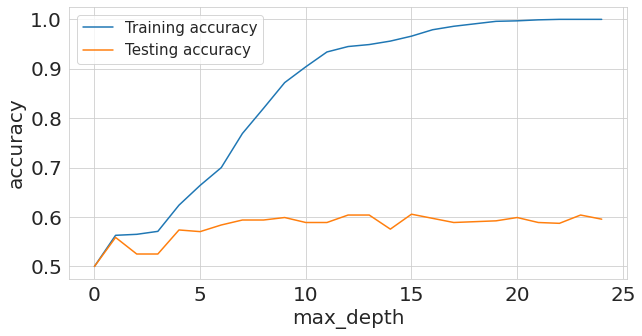

In [14]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label = 'Training accuracy')
plt.plot(test_accuracies, label = 'Testing accuracy')
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

Text(0, 0.5, 'count')

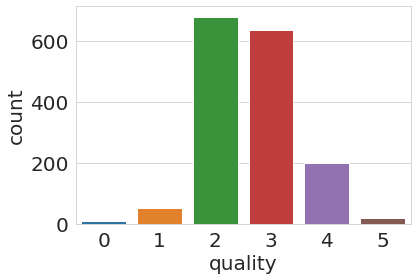

In [15]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count", fontsize=20)